In [1]:
!pip install TwitterAPI

In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from collections import Counter
import matplotlib.pyplot as plt
import networkx as nx
import sys
import time
import collections
from TwitterAPI import TwitterAPI

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [3]:
#Authorization 
consumer_key = '9EuwRt6iguuk07oWAcR6ddOyA'
consumer_secret = 'g45FKq2skMOHzXSKlY3dXk0LHE8laDtraCTiKo7FevPaV0CLg0'
access_token = '1261372133881585664-I0EM6IHZ96mqfrb2tjtaQDWTJf5cvU'
access_token_secret = '9I9uJQXaU2EfpqYv5gJWgIjXhRSdeKxTIHKgp34eybTLe'

In [4]:
#Constructing an instance of twitter API
def get_twitter():
  
    return TwitterAPI(consumer_key, consumer_secret, access_token, access_token_secret)

In [5]:
#providing user_names with the help of text file
def read_screen_names(filename):
    
    ###TODO
    pass

    file = open(filename)
    screen_names = list(file.readlines())
    file.close()

    screen_names = [s.strip() for s in screen_names]
    return screen_names

In [6]:
#Accessing twitterAPI, if request fails sleep for 15 min quit when max tries is reached.
def robust_request(twitter, resource, params, max_tries=5):
    for i in range(max_tries):
        request = twitter.request(resource, params)
        if request.status_code == 200:
            return request
        else:
            print('Got error %s \nsleeping for 15 minutes.' % request.text)
            sys.stderr.flush()
            time.sleep(61 * 15)

In [7]:
#for respective user from the screen_names provided retrieve the twitter user objects.
def get_users(twitter, screen_names):
    pass

    users = robust_request(twitter, 'users/lookup', {'screen_name':screen_names})
    print('lallala')
    print([u['screen_name'] for u in users])

    
    return users

In [8]:
#finding 500 nodes per user and it will be in ascending order.
def get_friends(twitter, screen_name):
    pass

    response = robust_request(twitter, 'friends/ids', {'screen_name':screen_name, 'count':500})
    friend = [i for i in response]

    return sorted(friend)

In [9]:
# for each user dictionary listed in sceen_name, adding friends as a key with friends ID's as a value.
def add_all_friends(twitter, users):
    pass

    for names in users:
        user_name = names['screen_name']
        names['friends'] = get_friends(twitter, user_name)

In [10]:
#sort by the candidate name and print the number of friend for each.
def print_num_friends(users):
    pass

    num_friends = {}
    for i in users:
        num_friends[i['screen_name']] = len(i['friends'])

    num_friends = sorted(num_friends.items(), key = lambda x: x[0])
    for name in num_friends:
        print(str(name[0]) + " " + str(name[1]))

In [11]:
# for each user return the count number of the friends who follow them back
def count_friends(users):
    pass

    c = Counter()
    for i in users:
        c.update(i['friends'])

    return c

In [12]:
#compute the friend overlap between two users and return the total
def friend_overlap(users):
    pass

    shared = []
    for i in range(0, len(users)):
        for j in range(i+1, len(users)):
            shared.append((users[i]['screen_name'], users[j]['screen_name'], len(set(users[i]['friends']).intersection(users[j]['friends']))))

    return sorted(shared, key = lambda x: (-x[2], x[0], x[1]))

In [13]:
# using networkx, returns an undirected graph with users as a main nodes with screen_names and their friends as a nodes with id's. 
# The connection between nodes is represented as edges.
# To reduce clutter the nodes being added are only thode which are followed by ,more than one user.
def create_graph(users, friend_counts):
    pass

    common = friend_counts.most_common()
    followed = []
    for id in common:
        if id[1] > 1:
            followed.append((id[0], id[1]))

    graph = nx.Graph()
    for name in users:
        graph.add_node(name['screen_name'])

    for i in followed:
        for j in range(len(users)):
            if i[0] in users[j]['friends']:
                graph.add_edge(i[0], users[j]['screen_name'])
            
   
    return graph


In [14]:
#saving a network diagram in png format using networkx.
def draw_network(graph, users, filename):
    pass

    candidates = {}
    for name in users:
        candidates[name['screen_name']] = name['screen_name']

    position = nx.spring_layout(graph,scale = 5)
    plt.axis("off")
    
    nx.draw_networkx_nodes(graph, position, node_size=200)
    nx.draw_networkx_edges(graph, position, alpha=0.4, width=1.5)
    nx.draw_networkx_labels(graph, labels=candidates, pos=position,font_size=11, node_color = 'b', 
        edge_color = 'o', font_color='r',cmap='g')

    plt.savefig(filename)

Established Twitter connection.
Read screen names: ['realDonaldTrump', 'JoeBiden', 'KamalaHarris', 'Mike_Pence', 'FoxNewsSunday', 'FaceTheNation']
lallala
['realDonaldTrump', 'JoeBiden', 'KamalaHarris', 'Mike_Pence', 'FoxNewsSunday', 'FaceTheNation']
found 6 users with screen_names ['FaceTheNation', 'FoxNewsSunday', 'JoeBiden', 'KamalaHarris', 'Mike_Pence', 'realDonaldTrump']
Friends per candidate:
FaceTheNation 500
FoxNewsSunday 500
JoeBiden 28
KamalaHarris 500
Mike_Pence 46
realDonaldTrump 50
Most common friends:
[(818910970567344128, 4), (939091, 3), (18166778, 3), (30354991, 3), (818927131883356161, 3)]
Friend Overlap:
[('FaceTheNation', 'FoxNewsSunday', 17), ('FoxNewsSunday', 'realDonaldTrump', 15), ('FoxNewsSunday', 'Mike_Pence', 13), ('Mike_Pence', 'realDonaldTrump', 13), ('FoxNewsSunday', 'KamalaHarris', 12), ('FoxNewsSunday', 'JoeBiden', 7), ('FaceTheNation', 'KamalaHarris', 4), ('JoeBiden', 'KamalaHarris', 4), ('FaceTheNation', 'realDonaldTrump', 3), ('FaceTheNation', 'Mike_P

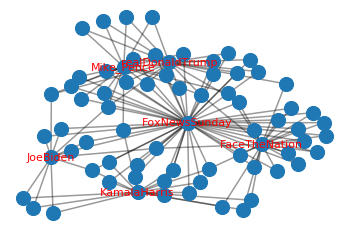

In [15]:
#running all the functions above to get friendship network among our six users.
#candidate.txt is a file containing names of our six candidates.
twitter = get_twitter()
screen_names = read_screen_names('candidates.txt')
print('Established Twitter connection.')
print('Read screen names: %s' % screen_names)
users = sorted(get_users(twitter, screen_names), key=lambda x: x['screen_name'])
print('found %d users with screen_names %s' % (len(users), str([u['screen_name'] for u in users])))
add_all_friends(twitter, users)
print('Friends per candidate:')
print_num_friends(users)
friend_counts = count_friends(users)
print('Most common friends:\n%s' % str(friend_counts.most_common(5)))
print('Friend Overlap:\n%s' % str(friend_overlap(users)))

graph = create_graph(users, friend_counts)
print('graph has %s nodes and %s edges' % (len(graph.nodes()), len(graph.edges())))
draw_network(graph, users, 'network.png')
    


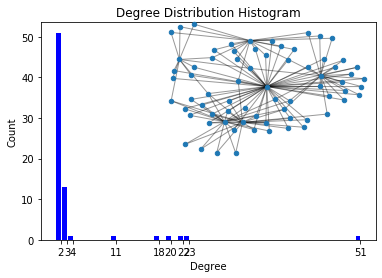

In [16]:
#Degree Distribution Histogram

degree_sequence=sorted([d for n,d in graph.degree()], reverse=True) # degree sequence
#print "Degree sequence", degree_sequence
degreeCount=collections.Counter(degree_sequence)
deg, cnt = zip(*degreeCount.items())

fig, ax = plt.subplots()
plt.bar(deg, cnt, width=0.80, color='b')

plt.title("Degree Distribution Histogram")
plt.ylabel("Count")
plt.xlabel("Degree")
ax.set_xticks([d+0.4 for d in deg])
ax.set_xticklabels(deg)

#graph in inset
plt.axes([0.4, 0.4, 0.5, 0.5])
pos=nx.spring_layout(graph)
plt.axis('off')
nx.draw_networkx_nodes(graph, pos, node_size=20)
nx.draw_networkx_edges(graph, pos, alpha=0.4)

plt.savefig("degree__distribution_histogram.png")
plt.show()


In [17]:
graph.degree

DegreeView({'FaceTheNation': 23, 'FoxNewsSunday': 51, 'JoeBiden': 11, 'KamalaHarris': 18, 'Mike_Pence': 20, 'realDonaldTrump': 22, 818910970567344128: 4, 939091: 3, 18166778: 3, 30354991: 3, 818927131883356161: 3, 17685258: 3, 39349894: 3, 172858784: 3, 620571475: 3, 2353605901: 3, 729676086632656900: 3, 822215679726100480: 3, 823367015830323201: 3, 822215673812119553: 3, 8370082: 2, 15324851: 2, 17539497: 2, 17906632: 2, 19455864: 2, 85606078: 2, 86697288: 2, 87048122: 2, 150078976: 2, 208120290: 2, 217543151: 2, 394351710: 2, 963480595: 2, 1330457336: 2, 1967216306: 2, 2167097881: 2, 799764016885329921: 2, 820452522494226433: 2, 830177829736345600: 2, 11134252: 2, 15007149: 2, 15985455: 2, 17494010: 2, 19471123: 2, 22203756: 2, 22703645: 2, 25101996: 2, 44196397: 2, 125453969: 2, 325830217: 2, 409486555: 2, 471672239: 2, 609476852: 2, 778798705: 2, 1013672084: 2, 1084375028: 2, 1249982359: 2, 1339835893: 2, 1615463502: 2, 2359926157: 2, 4121225056: 2, 818876014390603776: 2, 822127086

In [18]:
#Calculating graph properties
print("Eccentricity: ", nx.eccentricity(graph)) 
print("\n")
print("Diameter: ", nx.diameter(graph)) 
print("\n")
print("Radius: ", nx.radius(graph))
print("\n")
print("Preiphery: ", list(nx.periphery(graph))) 
print("\n")
print("Center: ", list(nx.center(graph))) 
print("\n")

Eccentricity:  {'FaceTheNation': 3, 'FoxNewsSunday': 3, 'JoeBiden': 3, 'KamalaHarris': 4, 'Mike_Pence': 3, 'realDonaldTrump': 4, 818910970567344128: 4, 939091: 4, 18166778: 4, 30354991: 4, 818927131883356161: 4, 17685258: 4, 39349894: 4, 172858784: 4, 620571475: 4, 2353605901: 4, 729676086632656900: 4, 822215679726100480: 4, 823367015830323201: 4, 822215673812119553: 4, 8370082: 4, 15324851: 4, 17539497: 4, 17906632: 4, 19455864: 4, 85606078: 4, 86697288: 4, 87048122: 4, 150078976: 4, 208120290: 4, 217543151: 4, 394351710: 4, 963480595: 4, 1330457336: 4, 1967216306: 4, 2167097881: 4, 799764016885329921: 4, 820452522494226433: 4, 830177829736345600: 4, 11134252: 4, 15007149: 4, 15985455: 4, 17494010: 4, 19471123: 4, 22203756: 4, 22703645: 4, 25101996: 4, 44196397: 4, 125453969: 4, 325830217: 4, 409486555: 4, 471672239: 4, 609476852: 4, 778798705: 4, 1013672084: 4, 1084375028: 4, 1249982359: 4, 1339835893: 4, 1615463502: 4, 2359926157: 4, 4121225056: 4, 818876014390603776: 4, 82212708619

In [19]:
#Network Measures for twitter friendship network
deg_centrality = nx.degree_centrality(graph) 
print("Degree Centrality",deg_centrality) 
print("\n")
eigenvector_centrality=nx.eigenvector_centrality(graph)
print("\n")
print("Eigenvector Centrality",eigenvector_centrality)
print("\n")
bet_centrality = nx.betweenness_centrality(graph, normalized = True,  endpoints = False) 
print("Betweeness",bet_centrality)
print("\n")
close_centrality = nx.closeness_centrality(graph) 
print("Closeness",close_centrality) 

Degree Centrality {'FaceTheNation': 0.32857142857142857, 'FoxNewsSunday': 0.7285714285714285, 'JoeBiden': 0.15714285714285714, 'KamalaHarris': 0.2571428571428571, 'Mike_Pence': 0.2857142857142857, 'realDonaldTrump': 0.3142857142857143, 818910970567344128: 0.05714285714285714, 939091: 0.04285714285714286, 18166778: 0.04285714285714286, 30354991: 0.04285714285714286, 818927131883356161: 0.04285714285714286, 17685258: 0.04285714285714286, 39349894: 0.04285714285714286, 172858784: 0.04285714285714286, 620571475: 0.04285714285714286, 2353605901: 0.04285714285714286, 729676086632656900: 0.04285714285714286, 822215679726100480: 0.04285714285714286, 823367015830323201: 0.04285714285714286, 822215673812119553: 0.04285714285714286, 8370082: 0.02857142857142857, 15324851: 0.02857142857142857, 17539497: 0.02857142857142857, 17906632: 0.02857142857142857, 19455864: 0.02857142857142857, 85606078: 0.02857142857142857, 86697288: 0.02857142857142857, 87048122: 0.02857142857142857, 150078976: 0.02857142

In [20]:
#all possible Shortest paths between our users
ls = (list(graph.nodes)[:6])
length = len(ls)
print("all possible Shortest paths between our users")
print("\n")
for i in range(0,length):
    for j in range(0,length):
        print(nx.shortest_path(graph,ls[i],ls[j]))

all possible Shortest paths between our users


['FaceTheNation']
['FaceTheNation', 939091, 'FoxNewsSunday']
['FaceTheNation', 30354991, 'JoeBiden']
['FaceTheNation', 939091, 'KamalaHarris']
['FaceTheNation', 818927131883356161, 'Mike_Pence']
['FaceTheNation', 18166778, 'realDonaldTrump']
['FoxNewsSunday', 939091, 'FaceTheNation']
['FoxNewsSunday']
['FoxNewsSunday', 818910970567344128, 'JoeBiden']
['FoxNewsSunday', 939091, 'KamalaHarris']
['FoxNewsSunday', 818910970567344128, 'Mike_Pence']
['FoxNewsSunday', 818910970567344128, 'realDonaldTrump']
['JoeBiden', 30354991, 'FaceTheNation']
['JoeBiden', 818910970567344128, 'FoxNewsSunday']
['JoeBiden']
['JoeBiden', 172858784, 'KamalaHarris']
['JoeBiden', 818910970567344128, 'Mike_Pence']
['JoeBiden', 818910970567344128, 'realDonaldTrump']
['KamalaHarris', 939091, 'FaceTheNation']
['KamalaHarris', 939091, 'FoxNewsSunday']
['KamalaHarris', 172858784, 'JoeBiden']
['KamalaHarris']
['KamalaHarris', 822215679726100480, 'Mike_Pence']
['KamalaHarris